In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [22]:
df.columns = df.columns.str.strip()

In [23]:
df.rename(columns={
    'Region': 'Region',
    'Date': 'Date',
    'Estimated Unemployment Rate': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate': 'Labour_Participation_Rate',
    'Area': 'State'
}, inplace=True)

In [24]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [25]:
df = df.sort_values(by='Date')


In [28]:
print(df.columns.tolist())


['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Employed', 'Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']


C:\Users\SANJEEV R\AppData\Local\Temp\ipykernel_10980\786914202.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SANJEEV R\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


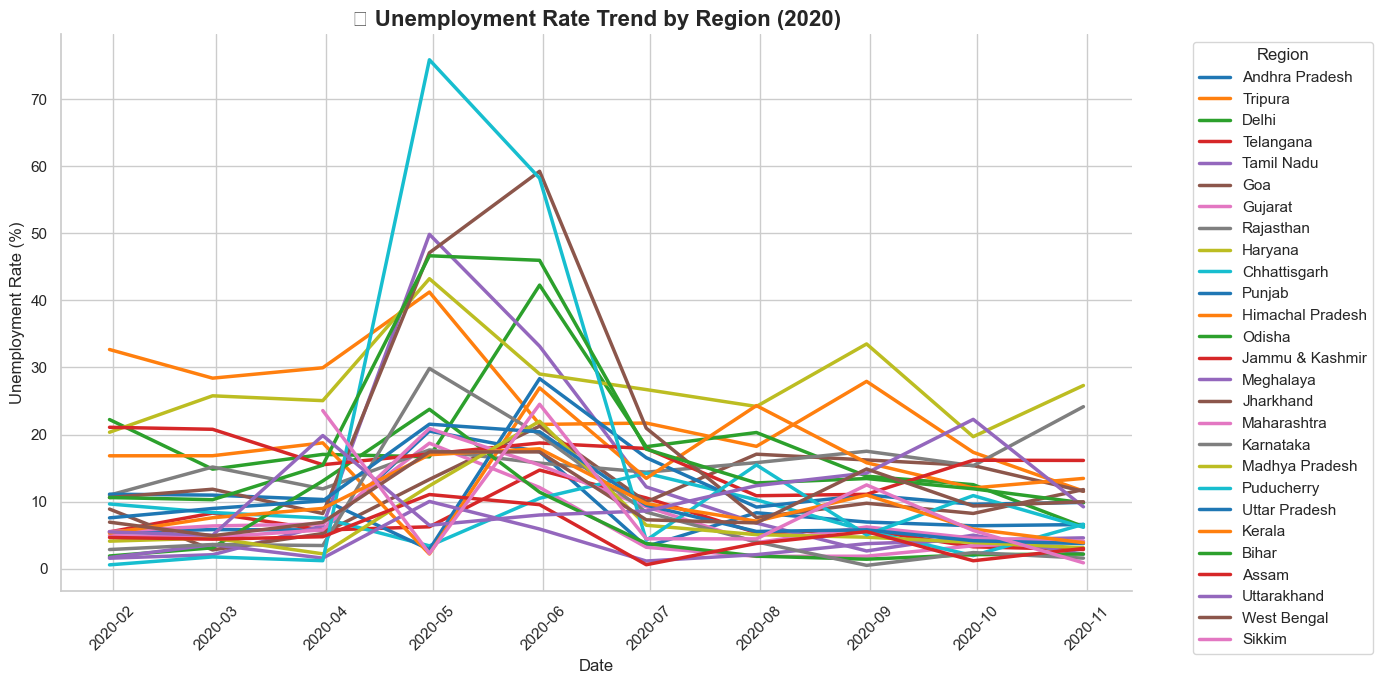

In [32]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region', palette='tab10', linewidth=2.5)

plt.title("📈 Unemployment Rate Trend by Region (2020)", fontsize=16, weight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Unemployment Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()


C:\Users\SANJEEV R\AppData\Local\Temp\ipykernel_10980\3893129966.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.values, y=top_regions.index, palette='Reds_r')
C:\Users\SANJEEV R\AppData\Local\Temp\ipykernel_10980\3893129966.py:20: UserWarning: Glyph 128314 (\N{UP-POINTING RED TRIANGLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SANJEEV R\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128314 (\N{UP-POINTING RED TRIANGLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


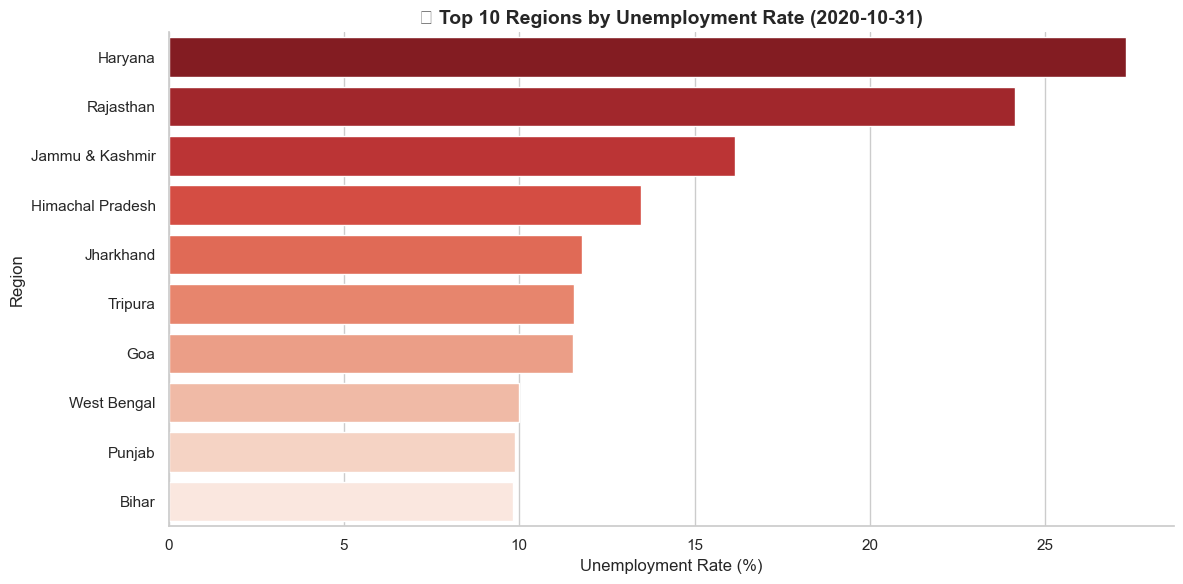

In [36]:
# Latest date in the dataset
latest_date = df['Date'].max()

# Filter data for the latest date
latest_df = df[df['Date'] == latest_date]

# Group by Region (not State) and get top 10 unemployment
top_regions = latest_df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(10)

# Bar Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=top_regions.values, y=top_regions.index, palette='Reds_r')
plt.title(f"🔺 Top 10 Regions by Unemployment Rate ({latest_date.date()})", fontsize=14, weight='bold')
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Region")
sns.despine()
plt.tight_layout()
plt.show()


C:\Users\SANJEEV R\AppData\Local\Temp\ipykernel_10980\2070113013.py:10: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SANJEEV R\AppData\Local\Temp\ipykernel_10980\2070113013.py:10: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\SANJEEV R\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SANJEEV R\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


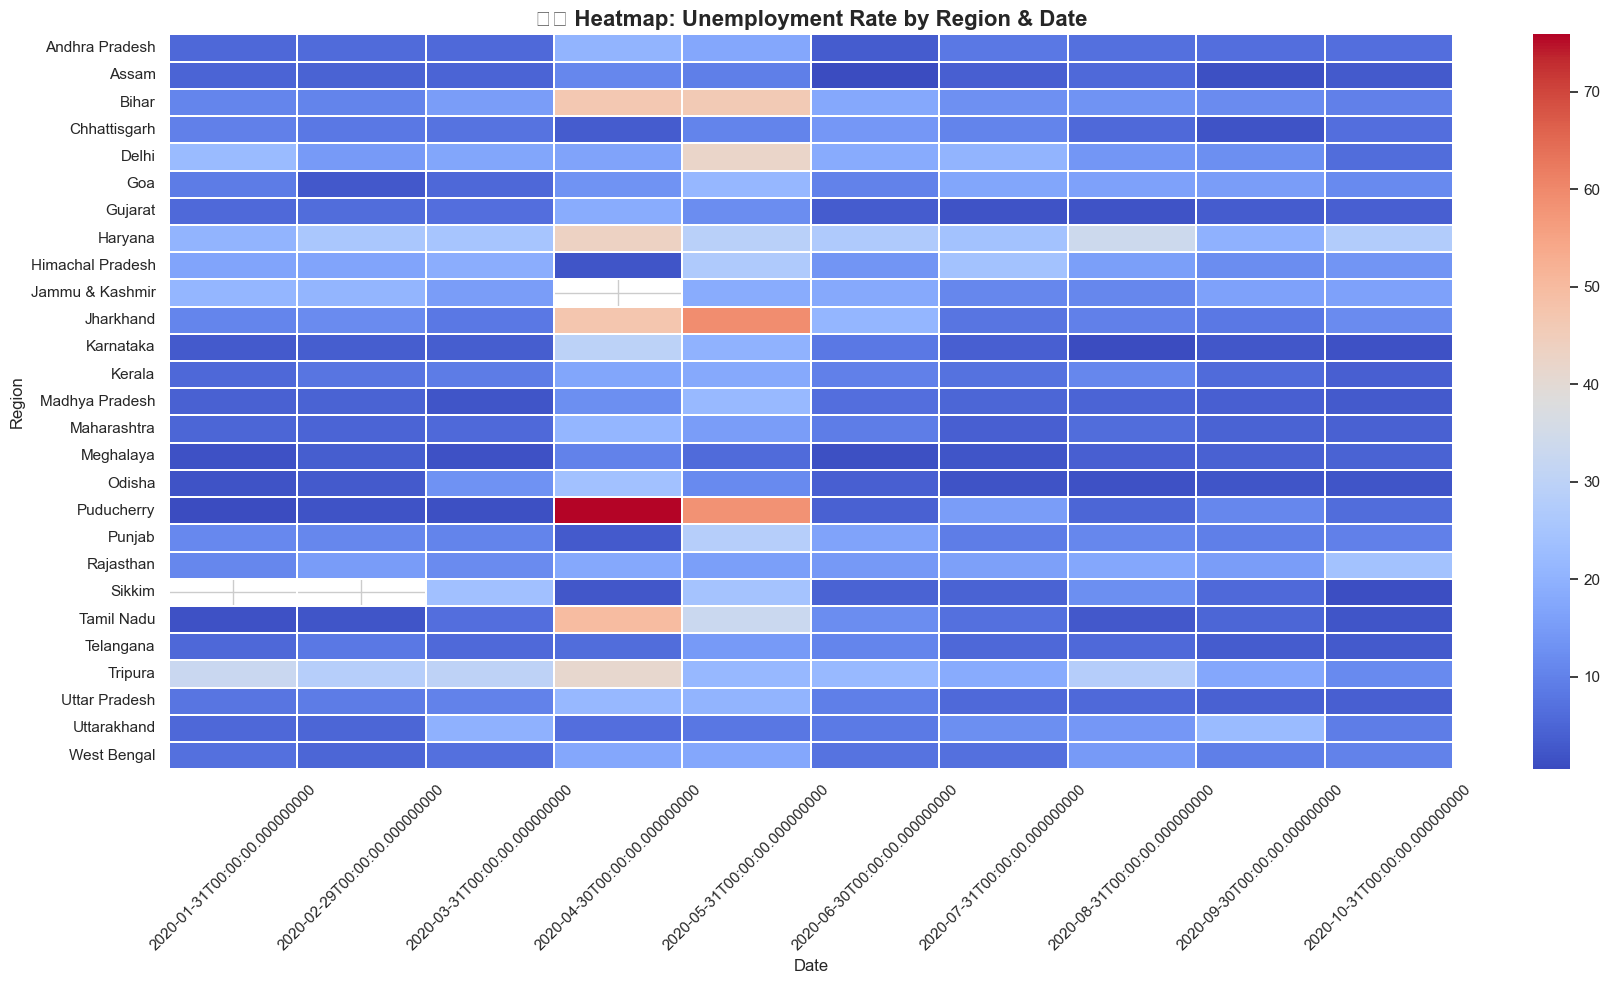

In [37]:
# Pivot table
heatmap_data = df.pivot_table(values='Estimated Unemployment Rate (%)', index='Region', columns='Date')

plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.3, linecolor='white')
plt.title("🌡️ Heatmap: Unemployment Rate by Region & Date", fontsize=16, weight='bold')
plt.xlabel("Date")
plt.ylabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
